In [1]:
from flask import Flask, render_template, request, jsonify , make_response , send_file
import re 
import ast
from flask_cors import CORS
import pandas as pd
import os

app = Flask(__name__)
CORS(app)


In [ ]:
from groq import Groq

client = Groq(
    api_key="", # API KEY HERE
)
df = []
tst = ""
info = ""

In [3]:
def search_dataset(message) :
    # Search DATASET ...

    chat_completion = client.chat.completions.create(
    messages=[

        {
            "role": "system",
            "content": "You are a Professional Data Scientist , Search for top 5 links from kaggle to download the dataset requested by the user , get some somewhere else if it is not in Kaggle , be precise" ,
        },
        {
            "role": "user",
            "content": f"{message}" ,
        }
    ],
    model="llama-3.1-8b-instant",
    )
    response_text = chat_completion.choices[0].message.content
    print(response_text)
    return response_text


In [4]:
def preprocess(mess) :

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"You are a Professional Data Scientist , Write a python code to complete the requested task , do all in inplace so that it updates in realtime" ,
            },
            {
                "role": "user", #and store the responses in a variable named as 'result'
                "content": f"This is the dataset i have : {tst} and it is loaded in a variable named as df, give a code to {mess} also call it  , give code only dont give explanation " ,
            }
        ],
        model="llama-3.1-8b-instant",
        )
    
    # akn = client.chat.completions.create(
    #     messages=[
    #         {
    #     "role": "user",
    #     "content": "Write a success aknowledgement message in 3 lines for {mess}" ,
    # }
    #     ],
    #     model="llama-3.1-8b-instant",
    #     )
    viss = chat_completion.choices[0].message.content
    viss =  re.sub('python', '', viss)
    viss =  re.sub('Python', '', viss)
    
    print(viss)
    pattern = r"```(.*?)```"
    local_context = {}  
    # Find all matches
    matches = re.findall(pattern, viss, re.DOTALL)
    pattern12 = r"$$(.*?)$$"
    matches12 = re.findall(pattern12, viss, re.DOTALL)

    # Safely parse the response text as a Python AST (Abstract Syntax Tree)
    parsed_ast = ast.parse(matches[0])
    result = ""
    # else:
    # Execute the parsed AST
    exec(compile(parsed_ast, filename="<ast>", mode="exec"))
    # result_value = local_context.get('result')

    return "matches12[0]",result


In [5]:
@app.route('/process_file', methods=['POST'])
def process_file():
    global info 
    global df
    global tst 
    file = request.files['file']
    if file:
        file.save('data.csv')
        df = pd.read_csv('data.csv')
        tst = df.head()
        info = df.info()
        chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": f"This is the dataset i have : {tst} , explain and overview of it in 2 lines" ,
            }
        ],
        model="llama-3.1-8b-instant",
        )
        response_text = chat_completion.choices[0].message.content
        print(response_text)
        return jsonify({'response': response_text})
    else:
        return jsonify({'response': 'No file provided'})




In [6]:
# # # Process CSV 
# # @app.route('/process_data', methods=['POST'])

# def process_csv () :
#     global df
#     path = ""
#     df = pd.read_csv(path)
#     chat_completion = client.chat.completions.create(
#     messages=[
#         {
#             "role": "user",
#             "content": f"This is the dataset i have : {tst} , explain and summarize it in 2 lines" ,
#         }
#     ],
#     model="llama3-8b-8192",
#     )
#     response_text = chat_completion.choices[0].message.content
#     print(response_text)


In [7]:
def suggest() :
    # Suggessions

    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": f"I'm working on preprocessing a DataSet ,  This is the dataset i have : {tst} and its info : {info},give me 3 suggests to what to do further in 3 lines" ,
        }
    ],
    model="llama-3.1-8b-instant",
    )
    response_text = chat_completion.choices[0].message.content
    return response_text

In [8]:
def others(mess) :

    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": f"You are a AI data analyst , answer the below question according to your role , QUESTION : {mess}" ,
        }
    ],
    model="llama-3.1-8b-instant",
    )
    response_text = chat_completion.choices[0].message.content
    return response_text

In [9]:
cnt=1

In [10]:
def visualize(mess) :
    # Visualize 
    global cnt
    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            # "content": f"This is the dataset i have : {tst} , give a code to visualize column1 and column2 also call it ,mention the column names exactly , give code only dont give explanation " ,
            "content": f"This is the dataset i have : {tst} , give a code to visualize {mess}using matplotlib , also call it ,give the column names exactly as in the dataset give clean code also save the plot as './static/plot{cnt}.png' "
        }
    ],
    model="llama-3.1-8b-instant",
    )
    viss = chat_completion.choices[0].message.content
    viss =  re.sub('python', '', viss)
    viss =  re.sub('Python', '', viss)
    pattern = r"```(.*?)```"

    # Find all matches
    matches = re.findall(pattern, viss, re.DOTALL)

    # Safely parse the response text as a Python AST (Abstract Syntax Tree)
    parsed_ast = ast.parse(matches[0])

    # else:
    # Execute the parsed AST
    exec(compile(parsed_ast, filename="<ast>", mode="exec"))
    
    return f"/static/plot{cnt}.png"



In [11]:
# def classify(mess) :
    
#     chat_completion = client.chat.completions.create(
#     messages=[
#         {
#             "role": "system",
#             "content": f"""You are an assistant with knowledge on Data Science who classifies user prompt into one of the following categories:
#               visualization : if user need to visualize the data using any plots or charts,
#               searching : If the user is searcing for dataset available in online or he wants any dataset to be searched ,
#               data_cleaning : If the user wants to do any cleaning or preprocessing tasks ,
#               model_training : If the user wants to train a Model ,
#               suggestions : if the user wants to get some suggessions to what to do with the dataset  ,
#               Quering_dataset : If the user whats to check what is in the the dataset like unique values , datatypes , df.head() , or df.tail() . 
              
#               \n\n Don't give any kind of Explanation just give the classification """ ,
#         },
#         {
#             "role": "user",
#             "content": f"{mess}" ,
#         }
#     ],
#     model="llama-3.1-8b-instant",
#     )
#     response_text = chat_completion.choices[0].message.content
#     return response_text

In [12]:

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/send_message', methods=['POST'])
def send_message():
    global cnt
    message = request.get_json()['message']
    cls = classify(message)
    print(cls)
    if "visualization" in cls :
        res = visualize(message)
        cnt += 1
        return jsonify({'response': "image" , "path" : res})
    elif "searching" in cls :
        res = search_dataset(message)

    elif 'data_cleaning' in cls or 'Quering_dataset' in cls :
        akg,msg = preprocess(message)
        res = akg+'\n\n' +msg
        # return res
    elif 'suggestions' in cls :
        res = suggest()
        # return res
    elif 'model_training' in cls :
        pass
        # res = suggest()
        # return res
    else :
        res = others(message)

    print(res)
    # if "visualize" in message.lower() or "plot" in message.lower() :
    #     res = visualize(message)
    #     cnt += 1
    #     return jsonify({'response': "image" , "path" : res})
    # response = process_message(message)
    return jsonify({'response': res })


def classify(mess) :
    
    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"""You are an assistant with knowledge on Data Science who classifies user prompt into one of the following categories:
              visualization : if user need to visualize the data using any plots or charts,
              searching : If the user is searcing for dataset available in online or he wants any dataset to be searched ,
              data_cleaning : If the user wants to do any cleaning or preprocessing tasks ,
              model_training : If the user wants to train a Model ,
              suggestions : if the user wants to get some suggessions to what to do with the dataset  ,
              Quering_dataset : If the user whats to check what is in the the dataset like unique values , datatypes , df.head() , or df.tail() , 
              Others : If the query doesn't falls below any of the above classes like Hi , Hello and more .

              \n\n Don't give any kind of Explanation just give the classification """ ,
        },
        {
            "role": "user",
            "content": f"{mess}" ,
        }
    ],
    model="llama-3.1-8b-instant",
    )
    response_text = chat_completion.choices[0].message.content
    return response_text
def process_message(message):
    # Implement your chatbot logic here
    res = ""
    if "search a dataset" in message.lower() :
        res = search_dataset(message)
        # return res

        # return res
    if 'preprocess' in message.lower() or 'clean' in message.lower() :
        res = preprocess(message)
        # return res
    if 'suggest' in message.lower() or 'next' in message.lower() :
        res = ()
        # return res
    else :
        res = others(message)
        
    return res
    return "image"


In [13]:
@app.route('/download', methods=['GET'])
def download_csv():
    # Convert the DataFrame to a CSV string
    csv_string = df.to_csv(index=False)

    # Set the response headers
    response = make_response(csv_string)
    response.headers['Content-Disposition'] = 'attachment; filename="data.csv"'
    response.headers['Content-Type'] = 'text/csv'

    return response

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:7000
Press CTRL+C to quit
127.0.0.1 - - [28/Jan/2026 23:32:47] "GET /static/videos/example.mp4 HTTP/1.1" 206 -
127.0.0.1 - - [28/Jan/2026 23:32:47] "GET /static/videos/example.mp4 HTTP/1.1" 206 -
127.0.0.1 - - [28/Jan/2026 23:32:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Jan/2026 23:32:57] "GET /static/videos/example.mp4 HTTP/1.1" 206 -


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

127.0.0.1 - - [28/Jan/2026 23:33:11] "POST /process_file HTTP/1.1" 200 -


Here's a 2-line overview of your dataset:

This dataset appears to contain information about residential properties, including their sale price, number of bedrooms and bathrooms, living and lot square footage, and other features such as waterfront view, condition, and year built. The dataset appears to be a sample of properties from the state of Washington, specifically from Seattle and surrounding areas, with a mix of older and newer homes and a wide range of price points.
visualization


[2026-01-28 23:33:32,568] ERROR in app: Exception on /send_message [POST]
Traceback (most recent call last):
  File "c:\Users\Rajesh Akaike\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    return self._engine.get_loc(casted_key)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7096, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'bedrooms'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\Rajesh Akaike\AppData\Local\Programs\Python\Python313\Lib\site-packages\flask\app.py", line 1511, in wsgi_app
    respon

visualization


<Figure size 1000x800 with 0 Axes>

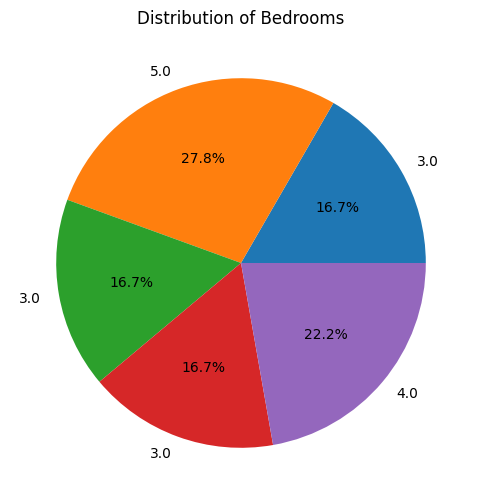

127.0.0.1 - - [28/Jan/2026 23:33:42] "POST /send_message HTTP/1.1" 200 -
127.0.0.1 - - [28/Jan/2026 23:33:42] "GET /static/plot1.png HTTP/1.1" 200 -


In [14]:
if __name__ == '__main__':
    app.run(port=7000)
